## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [2]:
import psycopg2
import pandas as pd


In [3]:

def execute_query(query_string, return_pandas=True, limit=50):
    """
    Create a function to execute queries.
    limit  (int): Maximum number of rows to return. Default is 50.
    """
    con = psycopg2.connect(database='mid_term_project', user='lhl_student', password='lhl_student',
        host='lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com', port='5432')
    cur = con.cursor()

    if limit:
        query_string+=' LIMIT '+str(limit)
        print(query_string)
    if return_pandas:
        response = pd.read_sql_query(query_string, con)
    else:
        cur.execute(query_string)
        response = cur.fetchall()
    con.close()
    return response


# Let's try out our function to make sure it does
# the same as what we have above

# query = """
# SELECT fl_date, flights FROM  flights LIMIT 1
# """
# execute_query(query)

In [17]:
query = """
SELECT * FROM  flights
"""
flight1 = execute_query(query,limit=10)
flight1.head()



SELECT * FROM  flights
 LIMIT 10


C:\Users\silvh\AppData\Local\Temp\ipykernel_7328\1330879112.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  response = pd.read_sql_query(query_string, con)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-11,AS,AS,AS,1907,AS,N363VA,1907,12889,LAS,...,414.0,None,None,None,None,None,None,None,None,None
1,2019-11-11,AS,AS,AS,1908,AS,N523VA,1908,14771,SFO,...,414.0,None,None,None,None,None,None,None,None,None
2,2019-11-11,AS,AS,AS,1909,AS,N285VA,1909,12889,LAS,...,414.0,None,None,None,None,None,None,None,None,None
3,2019-11-11,AS,AS,AS,1911,AS,N364VA,1911,12889,LAS,...,414.0,None,None,None,None,None,None,None,None,None
4,2019-11-11,AS,AS,AS,1912,AS,N637VA,1912,14747,SEA,...,1024.0,None,None,None,None,None,None,None,None,None


In [5]:
flight_columns = flight1.columns.to_list()
flight_columns

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'cancelled',
 'cancellation_code',
 'diverted',
 'dup',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'flights',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'first_dep_time',
 'total_add_gtime',
 'longest_add_gtime',
 'no_name']

In [6]:
query = """
SELECT * FROM  passengers
"""
passengers = execute_query(query,limit=5)


SELECT * FROM  passengers
 LIMIT 5


C:\Users\silvh\AppData\Local\Temp\ipykernel_7328\1330879112.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  response = pd.read_sql_query(query_string, con)


In [8]:
passengers_columns = passengers.columns.to_list()
passengers_columns

['departures_scheduled',
 'departures_performed',
 'payload',
 'seats',
 'passengers',
 'freight',
 'mail',
 'distance',
 'ramp_to_ramp',
 'air_time',
 'unique_carrier',
 'airline_id',
 'unique_carrier_name',
 'region',
 'carrier',
 'carrier_name',
 'carrier_group',
 'carrier_group_new',
 'origin_airport_id',
 'origin_city_market_id',
 'origin',
 'origin_city_name',
 'origin_country',
 'origin_country_name',
 'dest_airport_id',
 'dest_city_market_id',
 'dest',
 'dest_city_name',
 'dest_country',
 'dest_country_name',
 'aircraft_group',
 'aircraft_type',
 'aircraft_config',
 'year',
 'month',
 'distance_group',
 'class',
 'data_source']

In [43]:
query = """
SELECT * FROM fuel_comsumption
"""
fuel = execute_query(query,limit=10)
fuel_columns = fuel.columns.to_list()
fuel_columns


SELECT * FROM fuel_comsumption
 LIMIT 10


C:\Users\silvh\AppData\Local\Temp\ipykernel_7328\1330879112.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  response = pd.read_sql_query(query_string, con)


['month',
 'airline_id',
 'unique_carrier',
 'carrier',
 'carrier_name',
 'carrier_group_new',
 'sdomt_gallons',
 'satl_gallons',
 'spac_gallons',
 'slat_gallons',
 'sint_gallons',
 'ts_gallons',
 'tdomt_gallons',
 'tint_gallons',
 'total_gallons',
 'sdomt_cost',
 'satl_cost',
 'spac_cost',
 'slat_cost',
 'sint_cost',
 'ts_cost',
 'tdomt_cost',
 'tint_cost',
 'total_cost',
 'year']

In [42]:
query = """
SELECT fl_date  FROM  flights 
WHERE mkt_unique_carrier = "AS";
"""
TEST = execute_query(query,limit=10)



SELECT fl_date  FROM  flights 
WHERE mkt_unique_carrier = "AS";
 LIMIT 10


C:\Users\silvh\AppData\Local\Temp\ipykernel_7328\1330879112.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  response = pd.read_sql_query(query_string, con)


DatabaseError: Execution failed on sql '
SELECT fl_date  FROM  flights 
WHERE mkt_unique_carrier = "AS";
 LIMIT 10': syntax error at or near "LIMIT"
LINE 4:  LIMIT 10
         ^


In [11]:
fuel

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,None,0JQ,None,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016
5,1,19917.0,5X,5X,United Parcel Service,3,32138000.0,9743000.0,16116000.0,2972000.0,...,34098000.0,9752000.0,17965000.0,3524000.0,31241000.0,65339000.0,34098000.0,31241000.0,65339000.0,2016
6,1,20007.0,5Y,5Y,Atlas Air Inc.,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8575368.0,35795479.0,44370847.0,2016
7,1,19874.0,8C,8C,Air Transport International,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,42347.0,1855154.0,1897501.0,2016
8,1,20363.0,9E,9E,Endeavor Air Inc.,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
9,1,20190.0,9S,9S,Southern Air Inc.,2,821638.0,4696010.0,580875.0,0.0,...,1725440.0,9861621.0,1219839.0,0.0,11081460.0,12806900.0,1725440.0,11081460.0,12806900.0,2016


### Find the common columns between tables

In [13]:
flights_passengers_columns = set(flight_columns) & set(passengers_columns)
flights_passengers_columns

{'air_time',
 'dest',
 'dest_airport_id',
 'dest_city_name',
 'distance',
 'origin',
 'origin_airport_id',
 'origin_city_name'}

In [37]:
passengers_fuel_columns = set(passengers_columns) & set(fuel_columns)
passengers_fuel_columns

{'airline_id',
 'carrier',
 'carrier_group_new',
 'carrier_name',
 'month',
 'unique_carrier',
 'year'}

In [14]:
flights_fuel_columns = set(flight_columns) & set(fuel_columns)
flights_fuel_columns 

set()

In [38]:
common_columns = set(flight_columns) & set(passengers_columns) & set(fuel_columns)
common_columns

set()

### See if there are other keys on which to join tables

In [19]:
flight1.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-11,AS,AS,AS,1907,AS,N363VA,1907,12889,LAS,...,414.0,None,None,None,None,None,None,None,None,None
1,2019-11-11,AS,AS,AS,1908,AS,N523VA,1908,14771,SFO,...,414.0,None,None,None,None,None,None,None,None,None
2,2019-11-11,AS,AS,AS,1909,AS,N285VA,1909,12889,LAS,...,414.0,None,None,None,None,None,None,None,None,None
3,2019-11-11,AS,AS,AS,1911,AS,N364VA,1911,12889,LAS,...,414.0,None,None,None,None,None,None,None,None,None
4,2019-11-11,AS,AS,AS,1912,AS,N637VA,1912,14747,SEA,...,1024.0,None,None,None,None,None,None,None,None,None


In [39]:
flight1['fl_date'].dtype

dtype('O')

In [33]:
passengers.loc[:,passengers.columns.str.contains('carrier')]

,unique_carrier,unique_carrier_name,carrier,carrier_name,carrier_group,carrier_group_new
0,8V,Wright Air Service,8V,Wright Air Service,1,5
1,8V,Wright Air Service,8V,Wright Air Service,1,5
2,8V,Wright Air Service,8V,Wright Air Service,1,5
3,8V,Wright Air Service,8V,Wright Air Service,1,5
4,8V,Wright Air Service,8V,Wright Air Service,1,5


In [36]:
flight1.loc[:,flight1.columns.str.contains('carrier')]

,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,op_carrier_fl_num,carrier_delay
0,AS,AS,1907,AS,1907,None
1,AS,AS,1908,AS,1908,None
2,AS,AS,1909,AS,1909,None
3,AS,AS,1911,AS,1911,None
4,AS,AS,1912,AS,1912,None
5,AS,AS,1915,AS,1915,None
6,AS,AS,1916,AS,1916,None
7,AS,AS,1917,AS,1917,None
8,AS,AS,1920,AS,1920,None
9,AS,AS,1925,AS,1925,None


### Load the sample data

In [47]:
selected_flights_columns = [
    'fl_date',
    'branded_code_share',
    'op_unique_carrier',
    'tail_num',
    'op_carrier_fl_num',
    'origin_airport_id',
    'origin_city_name',
    'dest_airport_id',
    'dest_city_name',
    'crs_dep_time',
    'dep_time',
    'dep_delay',
    'taxi_out',
    'wheels_off',
    'wheels_on',
    'taxi_in',
    'crs_arr_time',
    'arr_time',
    'arr_delay',
    'cancelled',
    'cancellation_code',
    'diverted',
    'dup',
    'crs_elapsed_time',
    'actual_elapsed_time',
    'air_time',
    'flights',
    'distance',
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'security_delay',
    'late_aircraft_delay',
    'first_dep_time',
    'total_add_gtime',
    'longest_add_gtime',
    'no_name'
]

In [48]:
# query = f"""
# SELECT {selected_flights_columns} FROM  flights
# """
# # flights_sample = execute_query(query,limit=10)
# print(query)


In [49]:
flights = pd.read_csv('../midterm_shared/data/raw/flights_raw.csv')
flights

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-08-27,UA,UA_CODESHARE,UA,4900,C5,N16147,4900,11618,EWR,...,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-25,NK,NK,NK,892,NK,N665NK,892,13204,MCO,...,957.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-06,DL,DL,DL,2023,DL,N893AT,2023,12217,HSV,...,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-24,WN,WN,WN,1995,WN,N725SW,1995,14747,SEA,...,1024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-23,HA,HA,HA,346,HA,N483HA,346,12173,HNL,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2018-09-16,AA,AA_CODESHARE,AA,4912,PT,N609DP,4912,10990,CHO,...,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,2018-09-01,DL,DL_CODESHARE,DL,3494,9E,N8783E,3494,10397,ATL,...,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,2019-07-12,WN,WN,WN,2555,WN,N200WN,2555,14869,SLC,...,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,2019-05-27,AA,AA,AA,2731,AA,N856NN,2731,11057,CLT,...,541.0,NaN,NaN,NaN,NaN,NaN,1318.0,17.0,17.0,NaN


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [50]:
flights.loc[:,flights.columns.str.contains('delay')]


,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,-2.0,-13.0,NaN,NaN,NaN,NaN,NaN
1,-5.0,-23.0,NaN,NaN,NaN,NaN,NaN
2,-6.0,-10.0,NaN,NaN,NaN,NaN,NaN
3,4.0,-24.0,NaN,NaN,NaN,NaN,NaN
4,-5.0,-6.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9995,-14.0,-23.0,NaN,NaN,NaN,NaN,NaN
9996,-5.0,-13.0,NaN,NaN,NaN,NaN,NaN
9997,-3.0,-15.0,NaN,NaN,NaN,NaN,NaN
9998,27.0,14.0,NaN,NaN,NaN,NaN,NaN


In [56]:
# delayed_flights = flights['dep_delay']
flights.loc[:,flights.columns.str.contains('delay')].describe()
# 

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,9860.000000,9837.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000
mean,10.841176,5.599776,20.584189,3.540554,14.918378,0.055441,27.089836
std,46.507355,48.246246,61.339923,33.682784,32.145599,1.305831,48.998859
min,-29.000000,-59.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.000000,-6.000000,0.000000,0.000000,2.000000,0.000000,4.000000
75%,7.000000,8.000000,17.000000,0.000000,18.250000,0.000000,35.000000
max,1170.000000,1164.000000,1164.000000,974.000000,452.000000,48.000000,537.000000


(array([9.232e+03, 4.930e+02, 8.700e+01, 7.000e+00, 9.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([ -59. ,   63.3,  185.6,  307.9,  430.2,  552.5,  674.8,  797.1,
         919.4, 1041.7, 1164. ]),
 <BarContainer object of 10 artists>)

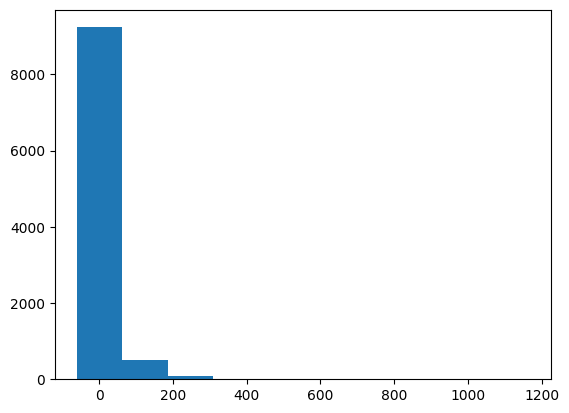

In [84]:
plt.hist(flights['arr_delay'])

In [85]:
print(st.normaltest(flights['arr_delay']))

NormaltestResult(statistic=nan, pvalue=nan)


In [86]:
print(st.shapiro(flights['arr_delay']))

ShapiroResult(statistic=nan, pvalue=1.0)


C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



In [126]:
# Unable to perform statistical tests with raw values.
# Data is not normally distributed and there are extreme outliers

dep_delay_outliers_filter = (flights['arr_delay'] > flights['arr_delay'].mean() -3 * flights['arr_delay'].std()) & (flights['arr_delay'] < flights['arr_delay'].mean() +3 * flights['arr_delay'].std())
flights_outliers_removed = flights[dep_delay_outliers_filter]


Text(0.5, 1.0, 'outliers removed')

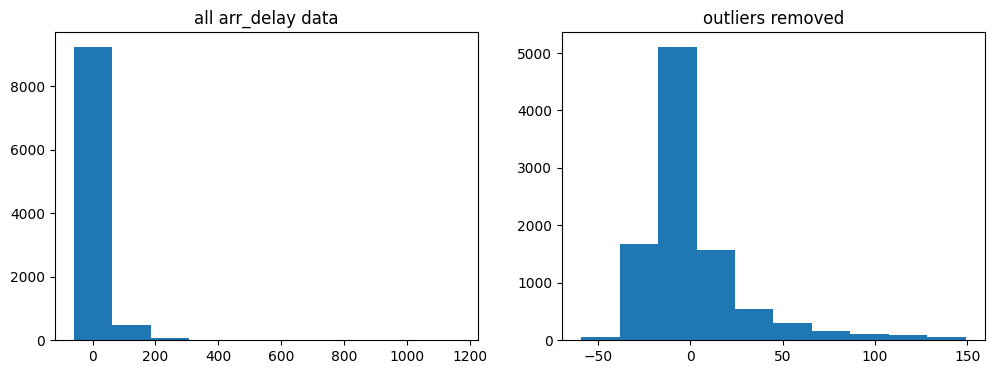

In [111]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))
ax[0].hist(flights['arr_delay'],bins=10)
ax[0].set_title('all arr_delay data')
ax[1].hist(flights_outliers_removed['arr_delay'],bins=10)
ax[1].set_title('outliers removed')
# plt.xlim(flights['arr_delay'].min(),flights['arr_delay'].max())

# ax[0].hist(flights['arr_delay'],bins=10)
# ax[0].set_title('all arr_delay data')
# ax[1].hist(flights_outliers_removed['arr_delay'],bins=10)
# ax[1].set_title('outliers removed')
# plt.xlim(flights['arr_delay'].min(),flights['arr_delay'].max())

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [133]:
# Convert dates
# from datetime import datetime
def date_columns(df,date_column='fl_date',format='%Y-%m-%d'):
    """
    
    Take the dates in a dateframes to create new columns:
        _date_standard: Datetime data 
        _year
        _month
    Parmaters:
    - df: Dataframe.
    - date_column: Name of the column containing the date strings.
    - Format: Original date format in the dateframe. Default: '%d.%m.%Y'
    
    Make sure to do the following import: 
    from datetime import datetime
    """
    date_column=str(date_column)
    
    # df[str(date_column+'_year')] = pd.to_datetime(df[date_column],
    #     format='%d.%m.%Y')
    date = pd.to_datetime(df[date_column],
        format=format)
    # df.get(str(date_column+'_standard'),date)
    # df.get(str(date_column+'_year'),date.dt.year)
    # df.get(str(date_column+'_month'),date.dt.month)
    df[str(date_column+'_standard')] = date
    df[str(date_column+'_year')] = date.dt.year
    df[str(date_column+'_month')] = date.dt.month
    return df


In [134]:
date_columns(flights_outliers_removed,date_column='fl_date')
flights_outliers_removed

C:\Users\silvh\AppData\Local\Temp\ipykernel_7328\48635832.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\silvh\AppData\Local\Temp\ipykernel_7328\48635832.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\silvh\AppData\Local\Temp\ipykernel_7328\48635832.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,fl_date_standard,fl_date_year,fl_date_month
0,2018-08-27,UA,UA_CODESHARE,UA,4900,C5,N16147,4900,11618,EWR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-27,2018,8
1,2018-02-25,NK,NK,NK,892,NK,N665NK,892,13204,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25,2018,2
2,2019-05-06,DL,DL,DL,2023,DL,N893AT,2023,12217,HSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-06,2019,5
3,2018-09-24,WN,WN,WN,1995,WN,N725SW,1995,14747,SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-24,2018,9
4,2018-01-23,HA,HA,HA,346,HA,N483HA,346,12173,HNL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-23,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2018-09-16,AA,AA_CODESHARE,AA,4912,PT,N609DP,4912,10990,CHO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-16,2018,9
9996,2018-09-01,DL,DL_CODESHARE,DL,3494,9E,N8783E,3494,10397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-01,2018,9
9997,2019-07-12,WN,WN,WN,2555,WN,N200WN,2555,14869,SLC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-12,2019,7
9998,2019-05-27,AA,AA,AA,2731,AA,N856NN,2731,11057,CLT,...,NaN,NaN,NaN,1318.0,17.0,17.0,NaN,2019-05-27,2019,5


In [143]:
flights_monthly = flights_outliers_removed.groupby('fl_date_month').agg(mean=('arr_delay','mean'),median=('arr_delay','median'))
flights_monthly

,mean,median
fl_date_month,,
1,-0.830667,-8.0
2,2.348529,-6.0
3,-0.931790,-7.0
4,0.063576,-7.0
5,2.129187,-6.0
6,5.461634,-4.0
7,3.533485,-5.0
8,4.237601,-5.0
9,-2.973214,-9.0


Text(0.5, 1.0, 'median arr_delay')

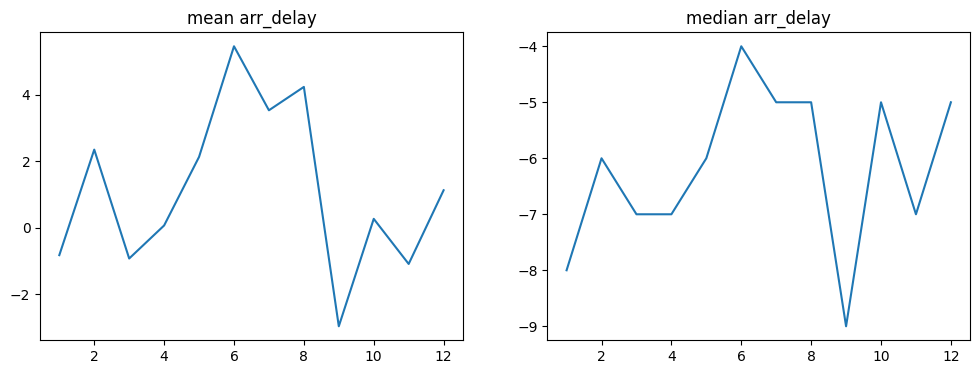

In [148]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))
ax[0].plot(flights_monthly['mean'])
ax[0].set_title('mean arr_delay') 
ax[1].plot(flights_monthly['median'])
ax[1].set_title('median arr_delay')

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

<AxesSubplot: xlabel='arr_time', ylabel='taxi_in'>

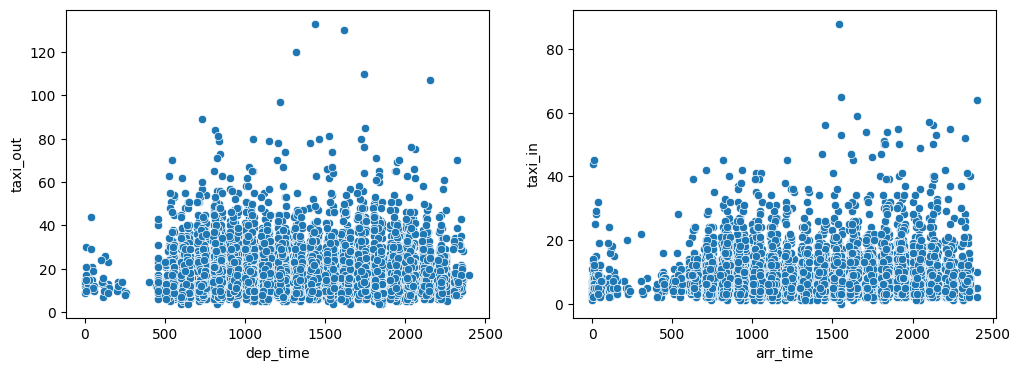

In [152]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))
sns.scatterplot(data=flights_outliers_removed, x='dep_time',y='taxi_out', ax=ax[0])
sns.scatterplot(data=flights_outliers_removed, x='arr_time',y='taxi_in', ax=ax[1])

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

Text(0.5, 0.98, 'Data for flights with arr_delay > 0.')

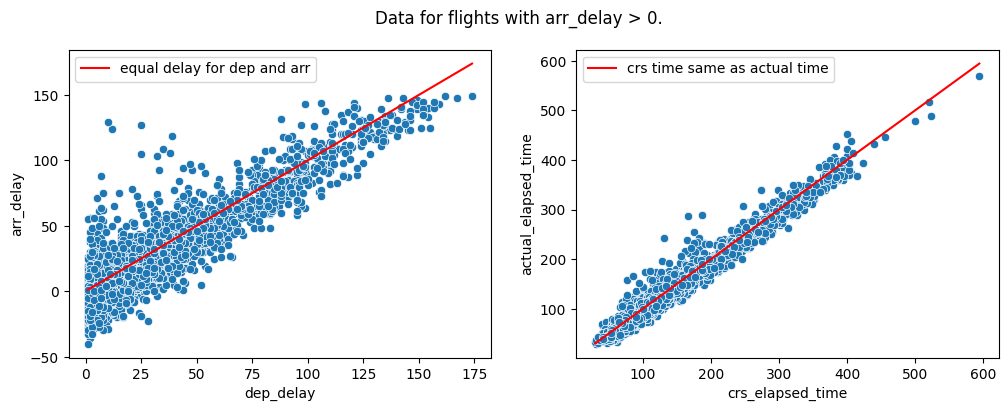

In [166]:

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))
sns.scatterplot(data=flights_outliers_removed[flights_outliers_removed['dep_delay']>0], x='dep_delay',y='arr_delay', ax=ax[0])
sns.lineplot(data=flights_outliers_removed[flights_outliers_removed['dep_delay']>0],x='dep_delay',y='dep_delay', ax=ax[0],c='red', label='equal delay for dep and arr')
sns.scatterplot(data=flights_outliers_removed[flights_outliers_removed['dep_delay']>0], x='crs_elapsed_time',y= 'actual_elapsed_time', ax=ax[1])
sns.lineplot(data=flights_outliers_removed[flights_outliers_removed['dep_delay']>0],x='crs_elapsed_time',y='crs_elapsed_time', ax=ax[1],c='red', label='crs time same as actual time')

fig.suptitle('Data for flights with arr_delay > 0.')

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?